In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

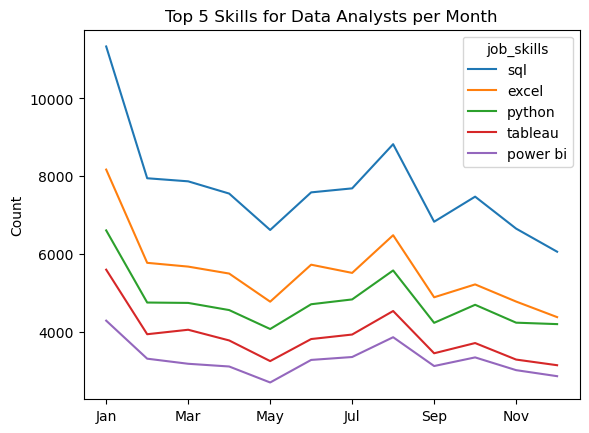

In [2]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

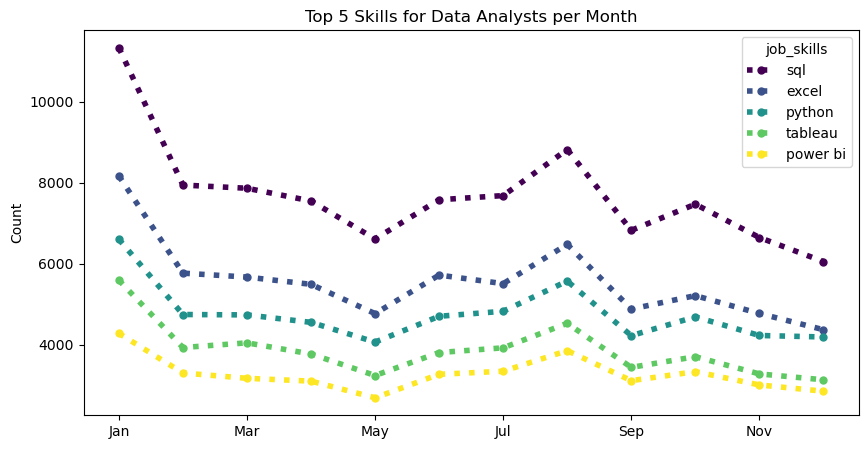

In [10]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis',
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    markersize=5,
    figsize=(10,5)
)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [ ]:
# Explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats

In [13]:
from adjustText import adjust_text

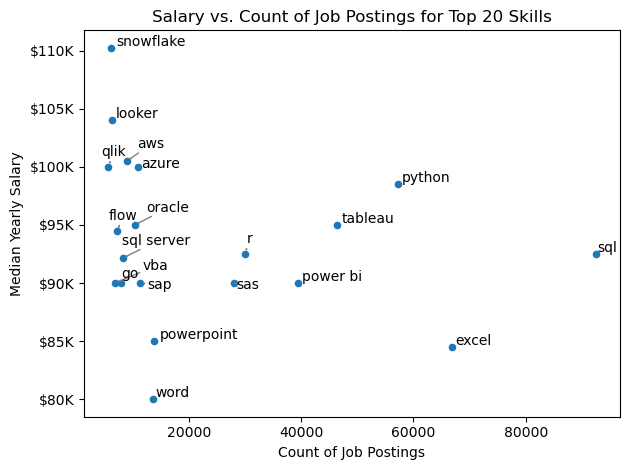

In [23]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1)) #this is where adjust text elements go

ax = plt.gca() #get current axis; need this to modify
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

🟩 Job Postings Trend for Cloud Engineers (2.16.1) - Problem
Matplotlib Advanced Customization
Problem Statement:
Create a line plot showing the trend of job postings over the months for Cloud Engineer job postings:

Create a new DataFrame called df_ce that filters only job postings that are 'Cloud Engineer'
Customize the plot by setting the line style to dotted, the line color to purple, and the marker style to 'o'.
Add a title 'Job Postings Trend for Cloud Engineers' and label the y-axis as 'Count of Job Postings'.

In [82]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.strftime('%b')
df_ce['job_posted_month_no'] = df_ce['job_posted_date'].dt.month

In [83]:
df_ce_tr = df_ce.groupby(['job_posted_month_no','job_posted_month']).agg(
    job_postings=('job_title_short', 'count')
)

In [87]:
df_ce_tr = df_ce_tr.reset_index()

In [88]:
df_ce_tr

,job_posted_month,job_posted_month_no,job_postings
0,Jan,1,1295
1,Feb,2,843
2,Mar,3,883
3,Apr,4,1051
4,May,5,480
5,Jun,6,714
6,Jul,7,1059
7,Aug,8,1378
8,Sep,9,1022
9,Oct,10,1186


In [92]:
df_ce_tr.plot(
    kind='line',
    x='job_posted_month',  # This should now exist after reset_index()
    y='job_postings',
    linestyle=':',
    color='purple',
    marker='o'
)

plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.legend('', frameon=False)
plt.show()

KeyError: 'job_posted_month'

In [51]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
48,Cloud Engineer,Lead Qa Engineer,"Ciudad Nezahualcóyotl, State of Mexico, Mexico",via BeBee,Full-time,False,Mexico,2023-11-11 14:06:06,False,False,Mexico,None,NaN,NaN,Zipdev,"[javascript, python, gcp, aws, selenium]","{'cloud': ['gcp', 'aws'], 'libraries': ['selen..."
288,Cloud Engineer,"Engineer – Data Center, Cloud",Abu Dhabi - United Arab Emirates,via BeBee,Full-time,False,United Arab Emirates,2023-09-20 13:21:48,False,False,United Arab Emirates,None,NaN,NaN,Etisalat,[node],{'webframeworks': ['node']}
295,Cloud Engineer,"Lead Engineer, Building","Saint-Étienne-du-Rouvray, France",via Emplois Trabajo.org,Full-time,False,France,2023-04-29 13:19:46,False,False,France,None,NaN,NaN,LHR Global,"[go, flow]","{'other': ['flow'], 'programming': ['go']}"
354,Cloud Engineer,Server Engineer,"Cape Town, South Africa",via LinkedIn,Full-time,False,South Africa,2023-09-22 13:43:18,False,False,South Africa,None,NaN,NaN,First Quantum Minerals,[azure],{'cloud': ['azure']}
355,Cloud Engineer,Environment Engineer,Bahrain,via BeBee,Full-time,False,Bahrain,2023-07-17 14:17:13,False,False,Bahrain,None,NaN,NaN,Al Hassanain,None,None


In [52]:
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.strftime('%b')
df_ce.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
48,Cloud Engineer,Lead Qa Engineer,"Ciudad Nezahualcóyotl, State of Mexico, Mexico",via BeBee,Full-time,False,Mexico,2023-11-11 14:06:06,False,False,Mexico,None,NaN,NaN,Zipdev,"[javascript, python, gcp, aws, selenium]","{'cloud': ['gcp', 'aws'], 'libraries': ['selen...",Nov
288,Cloud Engineer,"Engineer – Data Center, Cloud",Abu Dhabi - United Arab Emirates,via BeBee,Full-time,False,United Arab Emirates,2023-09-20 13:21:48,False,False,United Arab Emirates,None,NaN,NaN,Etisalat,[node],{'webframeworks': ['node']},Sep
295,Cloud Engineer,"Lead Engineer, Building","Saint-Étienne-du-Rouvray, France",via Emplois Trabajo.org,Full-time,False,France,2023-04-29 13:19:46,False,False,France,None,NaN,NaN,LHR Global,"[go, flow]","{'other': ['flow'], 'programming': ['go']}",Apr
354,Cloud Engineer,Server Engineer,"Cape Town, South Africa",via LinkedIn,Full-time,False,South Africa,2023-09-22 13:43:18,False,False,South Africa,None,NaN,NaN,First Quantum Minerals,[azure],{'cloud': ['azure']},Sep
355,Cloud Engineer,Environment Engineer,Bahrain,via BeBee,Full-time,False,Bahrain,2023-07-17 14:17:13,False,False,Bahrain,None,NaN,NaN,Al Hassanain,None,None,Jul


In [53]:
df_ce['job_posted_month_no'] = df_ce['job_posted_date'].dt.month
df_ce.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_month_no
48,Cloud Engineer,Lead Qa Engineer,"Ciudad Nezahualcóyotl, State of Mexico, Mexico",via BeBee,Full-time,False,Mexico,2023-11-11 14:06:06,False,False,Mexico,None,NaN,NaN,Zipdev,"[javascript, python, gcp, aws, selenium]","{'cloud': ['gcp', 'aws'], 'libraries': ['selen...",Nov,11
288,Cloud Engineer,"Engineer – Data Center, Cloud",Abu Dhabi - United Arab Emirates,via BeBee,Full-time,False,United Arab Emirates,2023-09-20 13:21:48,False,False,United Arab Emirates,None,NaN,NaN,Etisalat,[node],{'webframeworks': ['node']},Sep,9
295,Cloud Engineer,"Lead Engineer, Building","Saint-Étienne-du-Rouvray, France",via Emplois Trabajo.org,Full-time,False,France,2023-04-29 13:19:46,False,False,France,None,NaN,NaN,LHR Global,"[go, flow]","{'other': ['flow'], 'programming': ['go']}",Apr,4
354,Cloud Engineer,Server Engineer,"Cape Town, South Africa",via LinkedIn,Full-time,False,South Africa,2023-09-22 13:43:18,False,False,South Africa,None,NaN,NaN,First Quantum Minerals,[azure],{'cloud': ['azure']},Sep,9
355,Cloud Engineer,Environment Engineer,Bahrain,via BeBee,Full-time,False,Bahrain,2023-07-17 14:17:13,False,False,Bahrain,None,NaN,NaN,Al Hassanain,None,None,Jul,7


In [54]:
df_ce_tr = df_ce.groupby(['job_posted_month_no','job_posted_month']).agg(
    job_postings=('job_title_short', 'count')
)

df_ce_tr

,,job_postings
job_posted_month_no,job_posted_month,
1,Jan,1295
2,Feb,843
3,Mar,883
4,Apr,1051
5,May,480
6,Jun,714
7,Jul,1059
8,Aug,1378
9,Sep,1022


In [55]:
df_ce_tr.index

MultiIndex([( 1, 'Jan'),
            ( 2, 'Feb'),
            ( 3, 'Mar'),
            ( 4, 'Apr'),
            ( 5, 'May'),
            ( 6, 'Jun'),
            ( 7, 'Jul'),
            ( 8, 'Aug'),
            ( 9, 'Sep'),
            (10, 'Oct'),
            (11, 'Nov'),
            (12, 'Dec')],
           names=['job_posted_month_no', 'job_posted_month'])

In [100]:
df_ce_tr = df_ce_tr.reset_index()

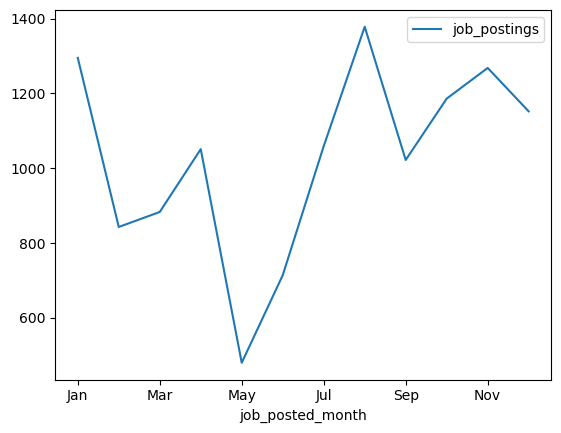

In [104]:
df_ce_tr.plot(
    kind='line',
    x='job_posted_month',  # Use the column you just set as the index if you prefer
    y='job_postings'
)
plt.show()

In [97]:
df_ce_tr = df_ce_tr.reset_index()
print(df_ce_tr.columns)

Index(['job_posted_month', 'job_posted_month_no', 'job_postings'], dtype='object')


In [98]:
if 'job_posted_month' in df_ce_tr.columns:
    print("job_posted_month is in the columns")
else:
    print("job_posted_month is not found")

job_posted_month is in the columns


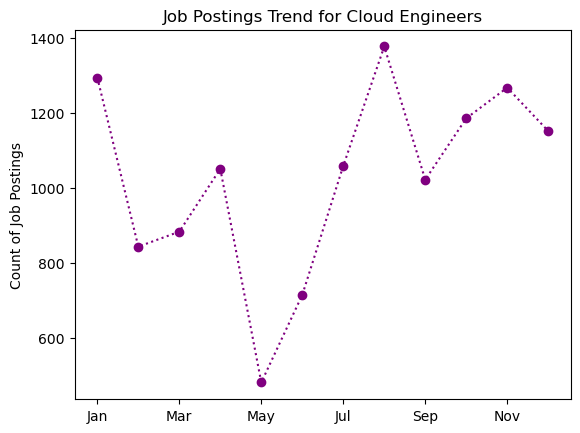

In [99]:
df_ce_tr.plot(
    kind='line',
    x='job_posted_month',  # This should now exist after reset_index()
    y='job_postings',
    linestyle=':',
    color='purple',
    marker='o'
)

plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.legend('', frameon=False)
plt.show()

In [76]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')
monthly_job_postings = df_ce.groupby('job_posted_month').size()
monthly_job_postings

job_posted_month
2023-01    1295
2023-02     843
2023-03     883
2023-04    1051
2023-05     480
2023-06     714
2023-07    1059
2023-08    1378
2023-09    1022
2023-10    1186
2023-11    1268
2023-12    1152
Freq: M, dtype: int64

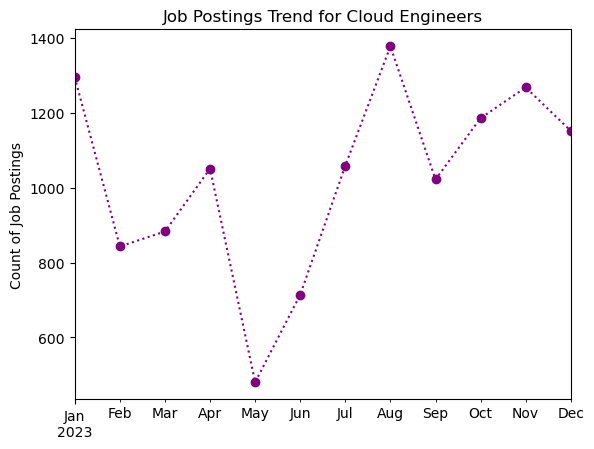

In [77]:
monthly_job_postings.plot(
 kind='line', 
 linestyle=':', 
 color='purple', 
 marker='o'
 )
plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.show()

🟨 Customize Bar Chart (2.16.2) - Problem
Matplotlib Advanced Customization
Problem Statement:
Create a bar chart showing the top 5 job companies hiring for Senior Data Analyst roles:

Create a DataFrame called SDA_df. 
Customize the plot by setting the bar colors to 5 different colors with the variable colors.
Add a grid to the y-axis only and making it dashes.
Rotate the x-axis labels by 45 degrees.
Label the y-axis as 'Number of Job Postings' and set the title to 'Top 5 Companies hiring Senior Data Analysts by Number of Postings'; Make the font size 14.

Code Needed
colors = ['blue', 'orange', 'green', 'red', 'purple']

In [148]:
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()
SDA_df = SDA_df.groupby('company_name').agg(
    job_postings=('job_title_short', 'count')
)
SDA_df = SDA_df.sort_values(by='job_postings', ascending=False).head(5)
SDA_df 

,job_postings
company_name,
UnitedHealth Group,390
Citi,356
Emprego,235
Wells Fargo,219
Walmart,141


In [149]:
SDA_df = SDA_df.reset_index()

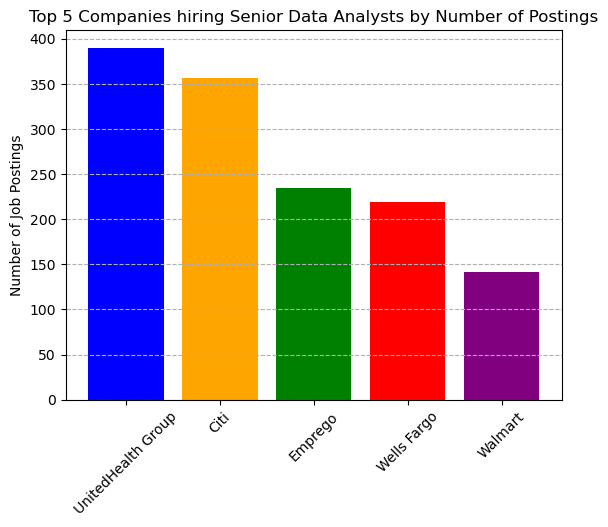

In [140]:
colors = ['blue', 'orange', 'green', 'red', 'purple']

plt.bar(SDA_df['company_name'], SDA_df['job_postings'], color = colors)

plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)

plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings')
plt.ylabel('Number of Job Postings')
plt.xlabel('')

plt.legend('', frameon=False)
plt.show()

In [124]:
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()
location_counts = SDA_df['company_name'].value_counts().head(5)
location_counts

company_name
UnitedHealth Group    390
Citi                  356
Emprego               235
Wells Fargo           219
Walmart               141
Name: count, dtype: int64

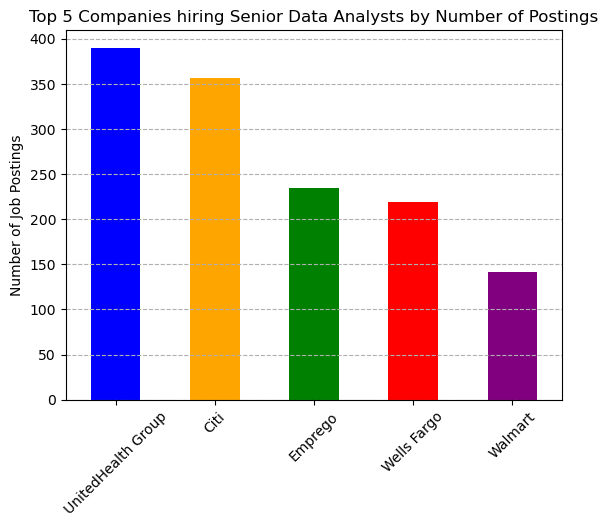

In [150]:
colors = ['blue', 'orange', 'green', 'red', 'purple']

SDA_df.plot(kind = 'bar',
x='company_name',
y='job_postings',
color = colors
)
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)

plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings')
plt.ylabel('Number of Job Postings')
plt.xlabel('')


plt.legend('', frameon=False)
plt.show()

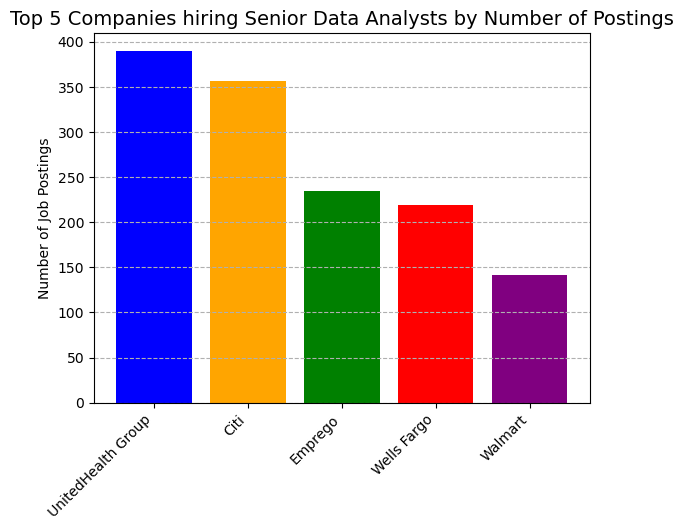

In [146]:
#Final Solution:
# Filter for Senior Data Analyst roles
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

# Get the top 5 companies by number of postings
location_counts = SDA_df['company_name'].value_counts().head(5)

# Custom colors
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot the bar chart
plt.bar(location_counts.index, location_counts.values, color=colors)
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()